In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
from matplotlib.pyplot import figure
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("/Users/dianagonzales/Downloads/BRAZIl_SOY_2.6.0_tc/BRAZIL_SOY_2.6.0_tc.csv", sep=",")
df = df[df["YEAR"] == 2020]
df = df[['EXPORTER GROUP', 'COUNTRY OF FIRST IMPORT', 'TOTAL']]
df = df.groupby(['EXPORTER GROUP', 'COUNTRY OF FIRST IMPORT']).sum('TOTAL')
df.reset_index(inplace = True)

In [3]:
alan = []
for i in range(0, len(df)):
    alan.append((df.loc[i]["EXPORTER GROUP"], df.loc[i]["COUNTRY OF FIRST IMPORT"], {'exports': df.loc[i]["TOTAL"]}))    

In [ ]:
#A = df.pivot(index='EXPORTER GROUP', columns ='COUNTRY OF FIRST IMPORT', values='TOTAL')
#G = nx.from_pandas_edgelist(df, 'EXPORTER GROUP', 'COUNTRY OF FIRST IMPORT', ['TOTAL'])

In [4]:
B = nx.Graph()

B.add_nodes_from(df['EXPORTER GROUP'].unique().tolist(), bipartite=0)
B.add_nodes_from(df['COUNTRY OF FIRST IMPORT'].unique().tolist(), bipartite=1)
B.add_edges_from(alan)

In [10]:
nodos = {}
for x in B.nodes:
    nodos[x] = len(B[x])
s = pd.Series(nodos, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)

In [12]:
one = df2[df2['connections'] == 1].index.to_list()

In [14]:
df3 = df[~df['EXPORTER GROUP'].isin(one)]

In [15]:
B = nx.Graph()

B.add_nodes_from(df3['EXPORTER GROUP'].unique().tolist(), bipartite=0)
B.add_nodes_from(df3['COUNTRY OF FIRST IMPORT'].unique().tolist(), bipartite=1)
B.add_edges_from(alan)

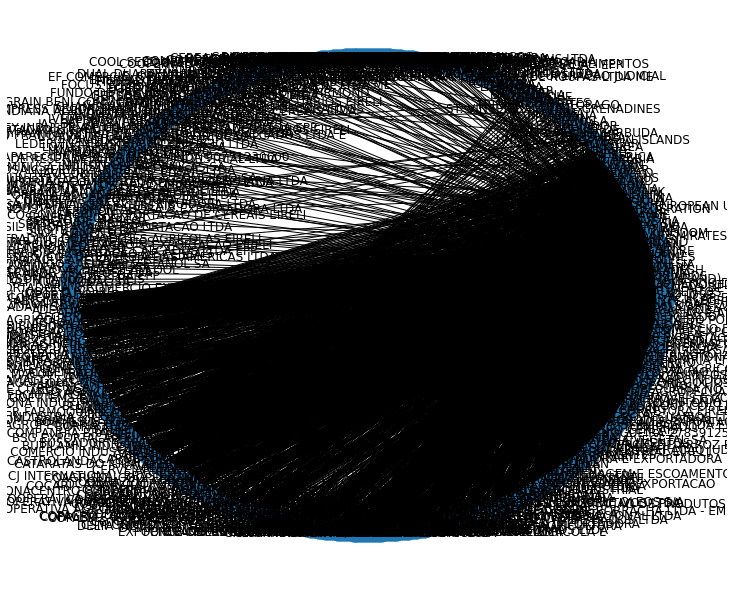

In [17]:
#G = nx.from_pandas_edgelist(df3, 'EXPORTER GROUP', 'COUNTRY OF FIRST IMPORT', ['TOTAL'])
figure(figsize=(10, 8))
nx.draw_shell(B, with_labels=True)

In [18]:
top = nx.bipartite.sets(B)[0]
pos = nx.bipartite_layout(B, top)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

In [ ]:
len(pd.unique(df3['EXPORTER GROUP']))

In [ ]:
B = nx.Graph()

B.add_nodes_from(df['EXPORTER GROUP'].unique().tolist(), bipartite=0)
B.add_nodes_from(df['COUNTRY OF FIRST IMPORT'].unique().tolist(), bipartite=1)
B.add_edges_from(alan)


In [ ]:
nx.biadjacency_matrix(B)